In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import seaborn as sns
import h5py
from tensorflow.keras.utils import to_categorical

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = h5py.File('/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [ ]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
X_test = data['X_test']
X_train = data['X_train']
X_val = data['X_val']

In [ ]:
X_train.dtype

dtype('<f4')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


In [ ]:
y_test = data['y_test']
y_train = data['y_train']
y_val = data['y_val']

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000,)
(18000,)
(60000,)


It is observed that the validation set is the combination of training and testing set.

Label: 6


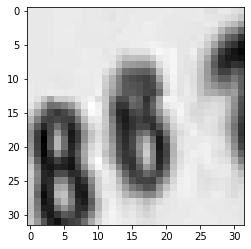

In [ ]:
print("Label: {}".format(y_train[500]))
plt.imshow(X_train[500], cmap='gray')

In [ ]:
labels = pd.DataFrame(y_train)

In [ ]:
labels.value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
dtype: int64

 There are 10 classes(0 to 9). So we can use 10 neurons at the output layer.

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


#### Visualisation of images

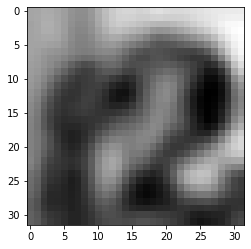

In [ ]:
plt.imshow(X_train[1024], cmap='gray')

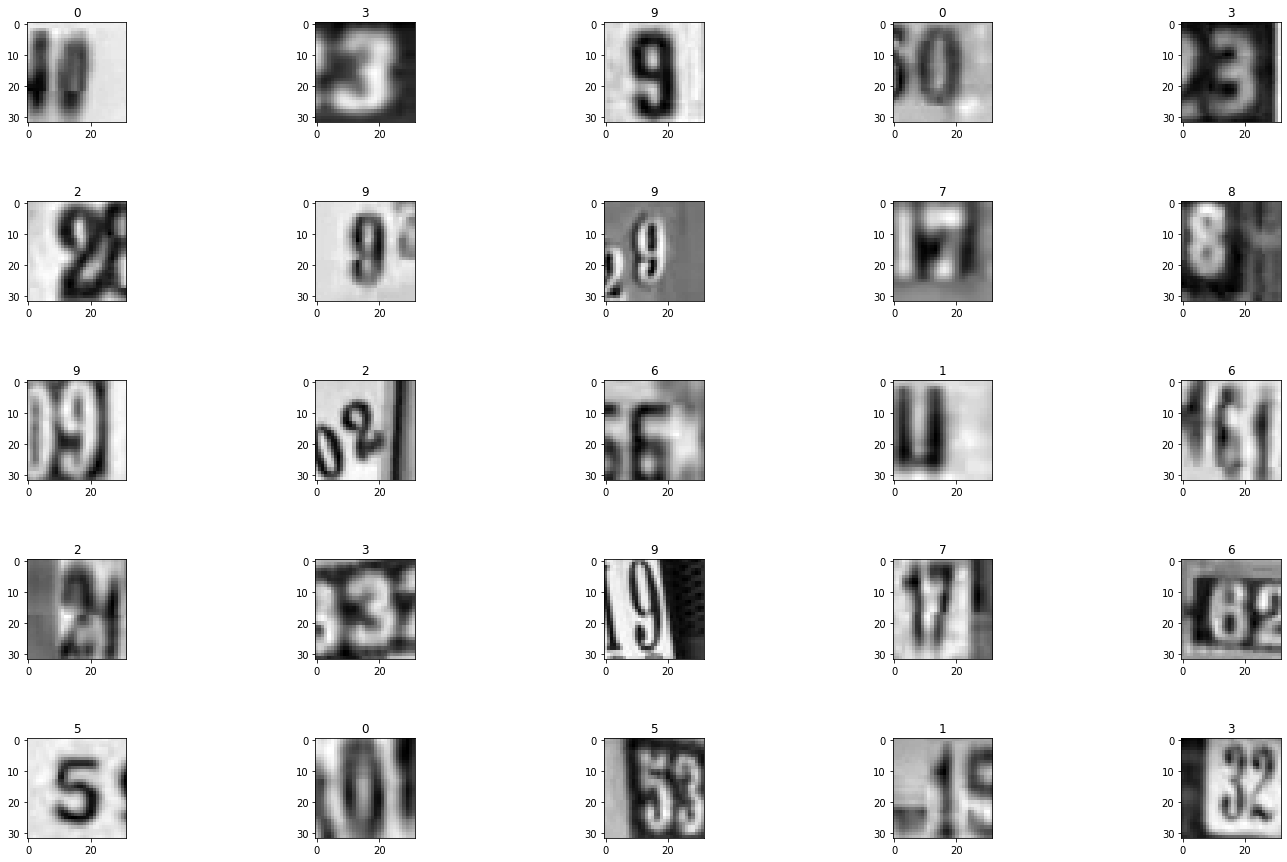

In [ ]:
grid_w = 5
grid_l = 5
fig, axis = plt.subplots(grid_l, grid_w, figsize=(25, 15))
axis = axis.ravel()
for a in range(grid_l * grid_w):
    i = np.random.randint(0, len(X_train))
    axis[a].imshow(X_train[i], cmap='gray')
    axis[a].set_title(y_train[i])
plt.subplots_adjust(hspace=0.8)
plt.show()

##### Reshaping X_train and X_test into compatible shapes

In [ ]:
X_train = X_train.reshape(42000,1024) ## 32 * 32 = 1024 the size of the image. 42000 is the number of image in the training set
X_test =  X_test.reshape(18000,1024)  ## 32 * 32 = 1024 the size of the image. 18000 is the number of image in the test set

##### Scaling the data

In [ ]:
print(X_train.max())
print(X_train.min())

x_train = (X_train / 255.0).astype('float32') 
x_test = (X_test / 255.0).astype('float32')

print(x_train.max())
print(x_train.min())

254.9745
0.0
0.9999
0.0


In [ ]:
x_train.dtype

dtype('float32')

##### Converting the target into categorical(one-hot encoding the class vector)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)   
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Initializing a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Flatten
from tensorflow.keras.activations import relu
from tensorflow.keras import optimizers

In [ ]:
svhn = Sequential()

In [ ]:
svhn.add(Dense(1024,activation = 'relu',input_shape=(1024,))) ## trying with 1024 input neurons.
svhn.add(Dense(10,activation = 'softmax'))                    ## output layer with 10 neurons.

In [ ]:
for l in svhn.layers:
  print(l.name,l.input_shape,'==>',l.output_shape)
 
print()
print(svhn.summary())

dense (None, 1024) ==> (None, 1024)
dense_1 (None, 1024) ==> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 512
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=False)
loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)
print("model training accuracy :" , history.history['accuracy'])
print("model validation accuracy : ", history.history['val_accuracy'])
print("model test accuracy : ", test_accuracy)

model training accuracy : [0.11044643074274063, 0.17839285731315613, 0.2741071283817291, 0.3766666650772095, 0.4741964340209961, 0.554107129573822, 0.602946400642395, 0.6371726393699646, 0.6552976369857788, 0.6653571724891663, 0.6838988065719604, 0.6873809695243835, 0.6937797665596008, 0.7041369080543518, 0.709970235824585, 0.7177380919456482, 0.7232440710067749, 0.7325000166893005, 0.7352678775787354, 0.740803599357605]
model validation accuracy :  [0.1513095200061798, 0.22428570687770844, 0.31261906027793884, 0.40607142448425293, 0.5209524035453796, 0.5938095450401306, 0.6090475916862488, 0.6547619104385376, 0.645714282989502, 0.6586904525756836, 0.6865476369857788, 0.6951190233230591, 0.6932142972946167, 0.7008333206176758, 0.7095237970352173, 0.7115476131439209, 0.7219047546386719, 0.7320238351821899, 0.7235714197158813, 0.7269047498703003]
model test accuracy :  0.730222225189209


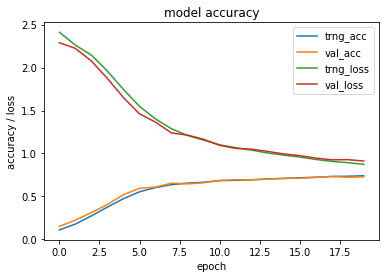

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()

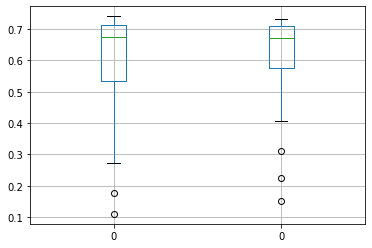

In [ ]:
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [ ]:
Trying with different batchsizes

Batchsize : 200
model training accuracy : [0.12461309880018234, 0.2648511826992035, 0.4597916603088379, 0.5550297498703003, 0.6075000166893005, 0.6327083110809326, 0.6553273797035217, 0.6712499856948853, 0.6794940233230591, 0.6939583420753479, 0.7026488184928894, 0.7100297808647156, 0.7182142734527588, 0.7282440662384033, 0.7310119271278381, 0.7379464507102966, 0.7432143092155457, 0.7490773797035217, 0.753303587436676, 0.7572916746139526]
model validation accuracy :  [0.15047618746757507, 0.37261903285980225, 0.540238082408905, 0.602738082408905, 0.6098809242248535, 0.6453571319580078, 0.6547619104385376, 0.6773809790611267, 0.6901190280914307, 0.6920238137245178, 0.7029761672019958, 0.6873809695243835, 0.7142857313156128, 0.713690459728241, 0.732619047164917, 0.7377380728721619, 0.7359523773193359, 0.7430952191352844, 0.7385714054107666, 0.741428554058075]
model test accuracy :  0.7375555634498596


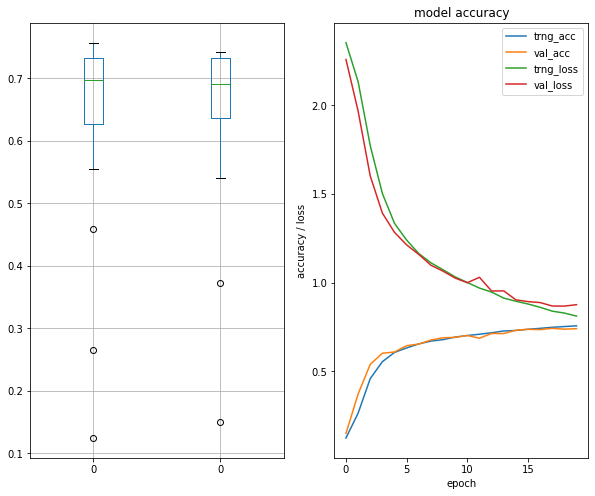

Batchsize : 250
model training accuracy : [0.12568452954292297, 0.27220237255096436, 0.4444642961025238, 0.5552976131439209, 0.6059821248054504, 0.6354464292526245, 0.6580356955528259, 0.6805654764175415, 0.6836606860160828, 0.6930357217788696, 0.7071428298950195, 0.7137500047683716, 0.7131845355033875, 0.7266964316368103, 0.737678587436676, 0.7430059313774109, 0.7454166412353516, 0.7512500286102295, 0.758184552192688, 0.7608630657196045]
model validation accuracy :  [0.19952380657196045, 0.3722619116306305, 0.5235714316368103, 0.6248809695243835, 0.6186904907226562, 0.6341666579246521, 0.6689285635948181, 0.6704761981964111, 0.6739285588264465, 0.7030952572822571, 0.708214282989502, 0.6966666579246521, 0.717380940914154, 0.7245237827301025, 0.7338095307350159, 0.7202380895614624, 0.7386904954910278, 0.7511904835700989, 0.745119035243988, 0.7621428370475769]
model test accuracy :  0.757777750492096


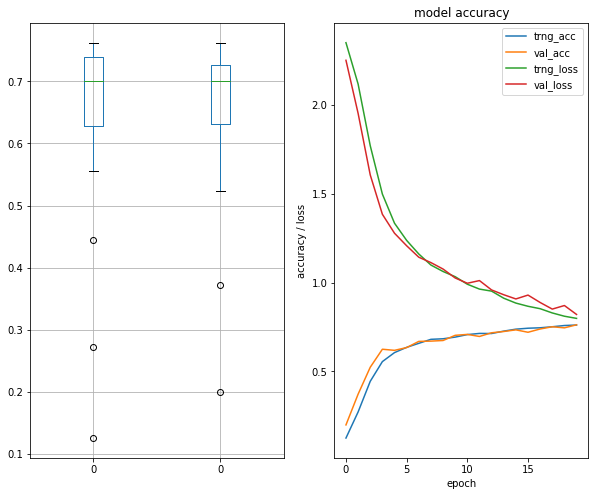

Batchsize : 300
model training accuracy : [0.11217261850833893, 0.19800595939159393, 0.348154753446579, 0.4781845211982727, 0.5674404501914978, 0.6083035469055176, 0.6408631205558777, 0.6568154692649841, 0.674047589302063, 0.6869642734527588, 0.6959821581840515, 0.7065476179122925, 0.7133631110191345, 0.7179762125015259, 0.7234523892402649, 0.7330357432365417, 0.7409523725509644, 0.7441369295120239, 0.7471725940704346, 0.7535416483879089]
model validation accuracy :  [0.13214285671710968, 0.27642858028411865, 0.4099999964237213, 0.5525000095367432, 0.5920237898826599, 0.6271428465843201, 0.6361904740333557, 0.6503571271896362, 0.6855952143669128, 0.7021428346633911, 0.6822618842124939, 0.6885714530944824, 0.7046428322792053, 0.7007142901420593, 0.7189285755157471, 0.7248809337615967, 0.7395238280296326, 0.7401190400123596, 0.7446428537368774, 0.7467857003211975]
model test accuracy :  0.7404999732971191


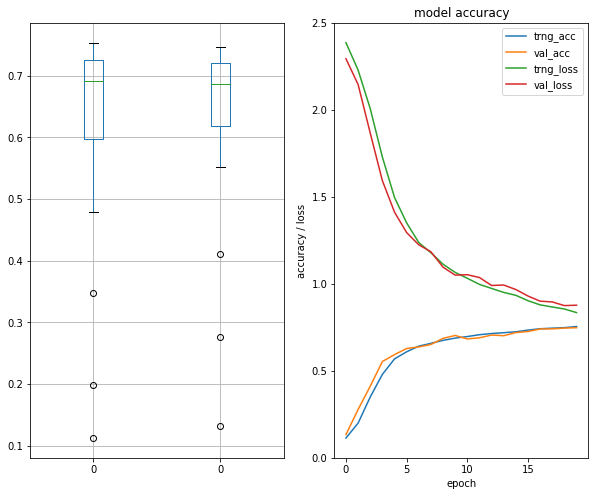

Batchsize : 350
model training accuracy : [0.1098809540271759, 0.18139880895614624, 0.3333035707473755, 0.475982129573822, 0.5634523630142212, 0.6132143139839172, 0.6370833516120911, 0.6532440185546875, 0.675000011920929, 0.6828571557998657, 0.6921428442001343, 0.7019047737121582, 0.7070237994194031, 0.7158035635948181, 0.7162797451019287, 0.7282738089561462, 0.7359821200370789, 0.7402083277702332, 0.7437797784805298, 0.7521428465843201]
model validation accuracy :  [0.11642856895923615, 0.20761904120445251, 0.39154762029647827, 0.4975000023841858, 0.5823809504508972, 0.6128571629524231, 0.6297619342803955, 0.6505952477455139, 0.6877381205558777, 0.6811904907226562, 0.6913095116615295, 0.697857141494751, 0.709761917591095, 0.7138095498085022, 0.7123809456825256, 0.7319047451019287, 0.7247619032859802, 0.7308333516120911, 0.746071457862854, 0.7280952334403992]
model test accuracy :  0.7296110987663269


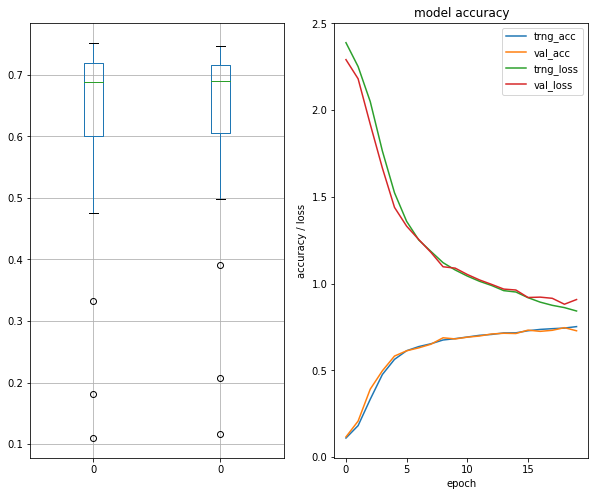

Batchsize : 400
model training accuracy : [0.11565475910902023, 0.21979166567325592, 0.3586011826992035, 0.4940178692340851, 0.5638095140457153, 0.6088392734527588, 0.6377975940704346, 0.6563690304756165, 0.6726785898208618, 0.6802083253860474, 0.6927381157875061, 0.7016369104385376, 0.7067261934280396, 0.7115476131439209, 0.7228571176528931, 0.7311607003211975, 0.7326487898826599, 0.7435119152069092, 0.7474404573440552, 0.749404788017273]
model validation accuracy :  [0.130952388048172, 0.289642870426178, 0.44404762983322144, 0.5410714149475098, 0.5934523940086365, 0.6145238280296326, 0.6529762148857117, 0.6728571653366089, 0.6796428561210632, 0.6896428465843201, 0.6776190400123596, 0.6875, 0.7038094997406006, 0.711904764175415, 0.7264285683631897, 0.7202380895614624, 0.7385714054107666, 0.733214259147644, 0.7270237803459167, 0.7346428632736206]
model test accuracy :  0.7336666584014893


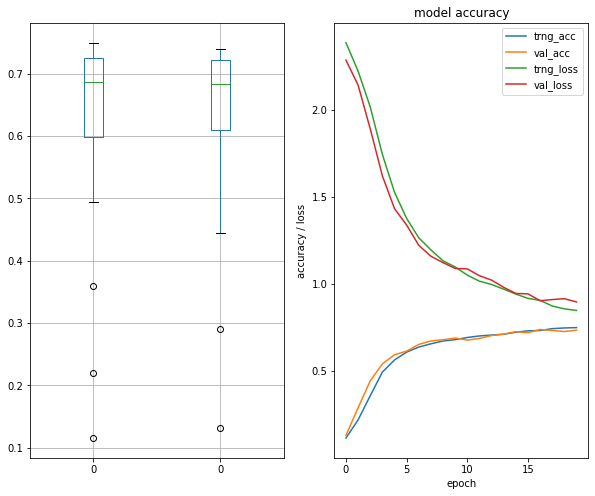

Batchsize : 450
model training accuracy : [0.11345238238573074, 0.18166667222976685, 0.28854167461395264, 0.4320535659790039, 0.5227083563804626, 0.5840178728103638, 0.622083306312561, 0.6349999904632568, 0.6558035612106323, 0.6687202453613281, 0.6799404621124268, 0.6916071176528931, 0.6979166865348816, 0.7072916626930237, 0.7134225964546204, 0.7222023606300354, 0.7289583086967468, 0.7330654859542847, 0.7412499785423279, 0.7478868961334229]
model validation accuracy :  [0.12059523910284042, 0.24095238745212555, 0.3720238208770752, 0.45500001311302185, 0.5621428489685059, 0.6053571701049805, 0.6373809576034546, 0.6474999785423279, 0.6648809313774109, 0.6726190447807312, 0.6776190400123596, 0.6940476298332214, 0.7007142901420593, 0.7086904644966125, 0.7034524083137512, 0.7146428823471069, 0.7198809385299683, 0.7214285731315613, 0.7327380776405334, 0.7295238375663757]
model test accuracy :  0.7308333516120911


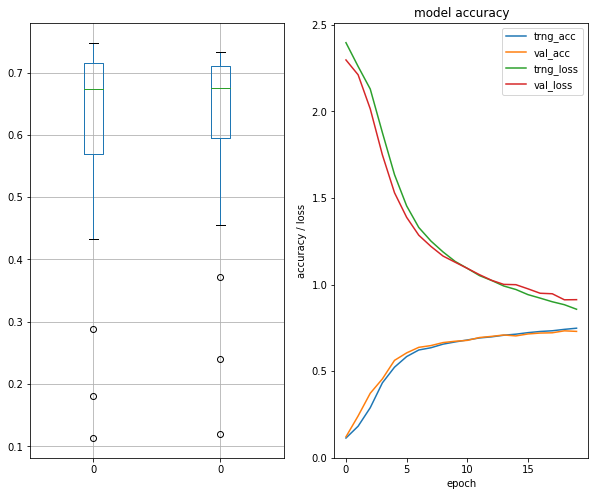

Batchsize : 500
model training accuracy : [0.11404761672019958, 0.19127976894378662, 0.3271428644657135, 0.4474404752254486, 0.5216666460037231, 0.5861309766769409, 0.6157440543174744, 0.6383928656578064, 0.6643154621124268, 0.6754761934280396, 0.684196412563324, 0.6937797665596008, 0.6995238065719604, 0.711726188659668, 0.7176190614700317, 0.7244940400123596, 0.730863094329834, 0.739464282989502, 0.7444047331809998, 0.7507143020629883]
model validation accuracy :  [0.15297618508338928, 0.24214285612106323, 0.40369048714637756, 0.44749999046325684, 0.5580952167510986, 0.5971428751945496, 0.5830952525138855, 0.6535714268684387, 0.6521428823471069, 0.6726190447807312, 0.6947619318962097, 0.6629762053489685, 0.7117857336997986, 0.7066666483879089, 0.7030952572822571, 0.7209523916244507, 0.7220237851142883, 0.7288095355033875, 0.728690505027771, 0.729285717010498]
model test accuracy :  0.7286666631698608


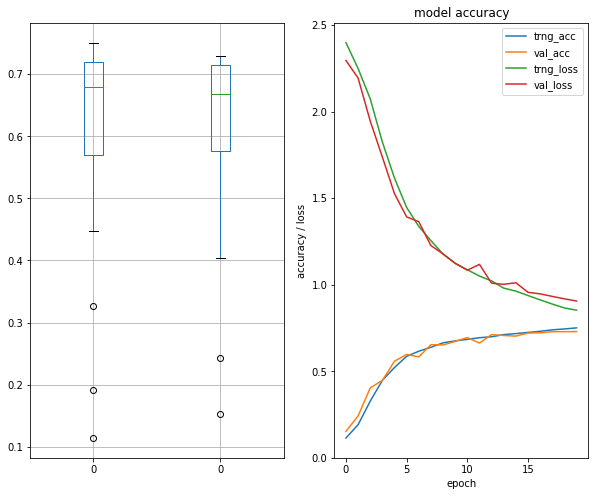

Batchsize : 600
model training accuracy : [0.11440476030111313, 0.16723214089870453, 0.2593750059604645, 0.37217262387275696, 0.46791666746139526, 0.5375893115997314, 0.5930356979370117, 0.6231547594070435, 0.6464880704879761, 0.6549404859542847, 0.6688392758369446, 0.682232141494751, 0.6951785683631897, 0.6987797617912292, 0.7070833444595337, 0.7082738280296326, 0.7204464077949524, 0.7297321557998657, 0.7353273630142212, 0.737886905670166]
model validation accuracy :  [0.1344047635793686, 0.19238094985485077, 0.30523809790611267, 0.41880953311920166, 0.4915476143360138, 0.5605952143669128, 0.6104761958122253, 0.6284523606300354, 0.6610714197158813, 0.6514285802841187, 0.6779761910438538, 0.6863095164299011, 0.7010714411735535, 0.7007142901420593, 0.6927381157875061, 0.7067857384681702, 0.7225000262260437, 0.7232142686843872, 0.7363095283508301, 0.7359523773193359]
model test accuracy :  0.7328333258628845


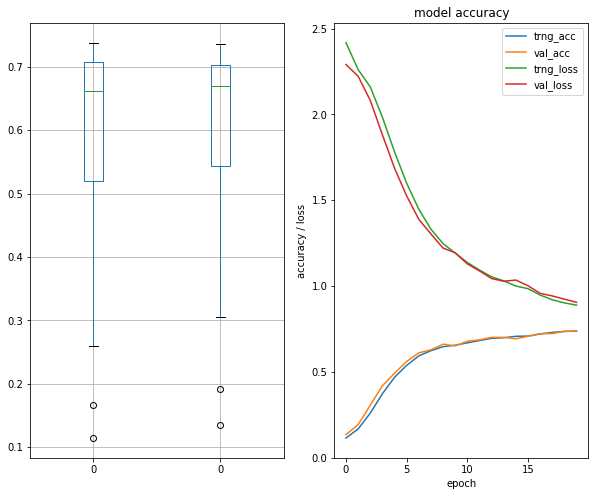

In [ ]:
batch_size = [200,250,300,350,400,450,500,600]  ## lesser batch size
epochs = 20

for i in batch_size:
  print("Batchsize :", i)
  svhn = Sequential()
  svhn.add(Dense(1024,activation = 'relu',input_shape=(1024,))) ## trying with 1024 input neurons.
  svhn.add(Dense(10,activation = 'softmax'))
  svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = svhn.fit(x_train, y_train, batch_size= i, epochs=epochs, validation_split=0.2, verbose=False)
  loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)
  print("model training accuracy :" , history.history['accuracy'])
  print("model validation accuracy : ", history.history['val_accuracy'])
  print("model test accuracy : ", test_accuracy)

  f, axes = plt.subplots(1, 2, figsize = (10,8))
  ta = pd.DataFrame(history.history['accuracy'])
  va = pd.DataFrame(history.history['val_accuracy'])
  tva = pd.concat([ta,va] , axis=1)
  tva.boxplot(ax=axes[0])

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model accuracy')
  plt.ylabel('accuracy / loss')
  plt.xlabel('epoch')
  plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
  plt.show()

  

In [ ]:
Observation:
  *) From the above plot, we can use batch size=300,350 for better generalisable model.
  *) Smaller the batch size helps us to move out of local minima and reaching the global minima.


#### Trying with two layers of 1024 neurons each with batch size of 300.

In [ ]:
svhn = Sequential()
svhn.add(Dense(1024,activation = 'relu',input_shape=(1024,))) ## trying with 1024 input neurons.
svhn.add(Dense(1024,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
 batch_size = 300
 epochs = 20

 svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 history = svhn.fit(x_train, y_train, batch_size= i, epochs=epochs, validation_split=0.2, verbose=False)
 loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)
 print()
 print("model training accuracy :" , history.history['accuracy'])
 print("model validation accuracy : ", history.history['val_accuracy'])
 print("model test accuracy : ", test_accuracy)


model training accuracy : [0.12205357104539871, 0.2743154764175415, 0.4637797474861145, 0.5758333206176758, 0.6260416507720947, 0.6602976322174072, 0.6818749904632568, 0.6953868865966797, 0.711517870426178, 0.725982129573822, 0.7277083396911621, 0.7442262172698975, 0.7529464364051819, 0.7633333206176758, 0.7673512101173401, 0.7704761624336243, 0.7768452167510986, 0.7860416769981384, 0.7850297689437866, 0.7944940328598022]
model validation accuracy :  [0.16535714268684387, 0.3816666603088379, 0.5370237827301025, 0.6111904978752136, 0.6517857313156128, 0.6717857122421265, 0.6602380871772766, 0.6941666603088379, 0.7047619223594666, 0.7155952453613281, 0.7315475940704346, 0.7240476012229919, 0.7453571557998657, 0.7590476274490356, 0.746666669845581, 0.7389285564422607, 0.7704761624336243, 0.772857129573822, 0.7647619247436523, 0.7854762077331543]
model test accuracy :  0.7822777628898621


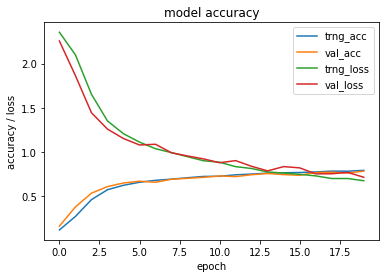

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()

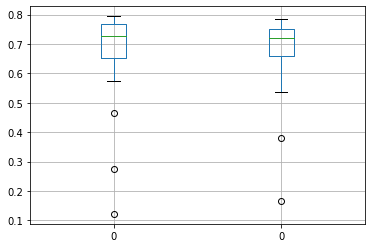

In [ ]:
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Accuracy is increased. Training = 79.4%, Validation = 78.52%, Testing = 78.2%

#### Increasing the hidden layers with 1024 neurons each

### Number of Hidden layers

In [ ]:
batch_size=300
epochs=20

In [ ]:
def create_dense(layer_sizes):
    print(layer_sizes)
    svhn1 = Sequential()
    svhn1.add(Dense(layer_sizes[0], activation='relu', input_shape=(1024,)))

    for s in layer_sizes[1:]:
        svhn1.add(Dense(units = s, activation = 'relu'))

    svhn1.add(Dense(units=10, activation='softmax'))
    return svhn1

def evaluate(svhn1, batch_size=batch_size, epochs=epochs):
    svhn1.summary()
    svhn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = svhn1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=False)
    loss,accuracy  = svhn1.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    
    f, axes = plt.subplots(1, 2, figsize = (10,8))
    ta = pd.DataFrame(history.history['accuracy'])
    va = pd.DataFrame(history.history['val_accuracy'])
    tva = pd.concat([ta,va] , axis=1)
    tva.boxplot(ax=axes[0])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

[1024, 1024]
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_109 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_110 (Dense)            (None, 10)                10250     
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.796500027179718


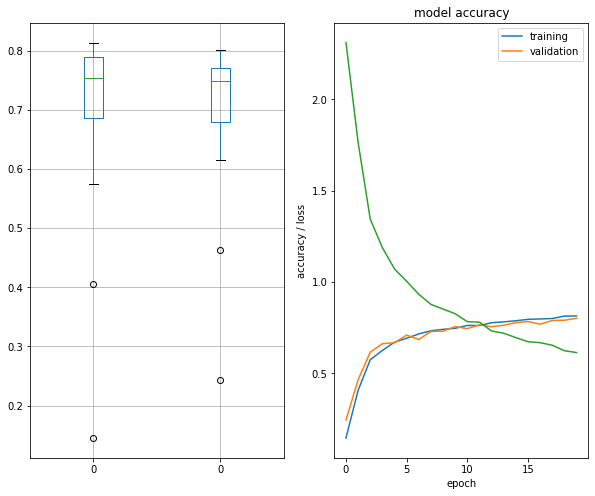

[1024, 1024, 1024]
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_112 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_113 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_114 (Dense)            (None, 10)                10250     
Total params: 3,159,050
Trainable params: 3,159,050
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8132222294807434


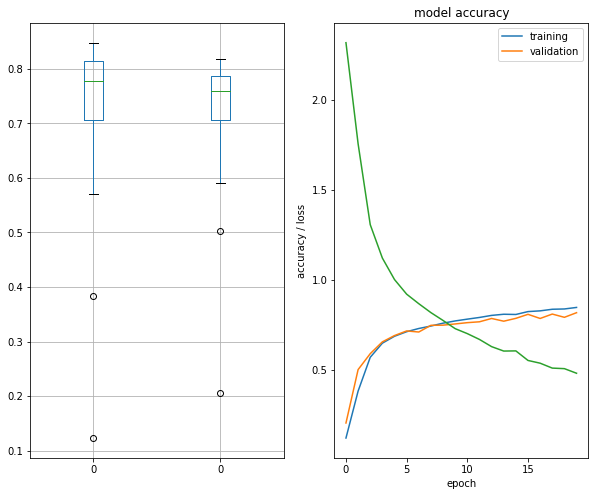

[1024, 1024, 1024, 1024]
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_116 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_117 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_118 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_119 (Dense)            (None, 10)                10250     
Total params: 4,208,650
Trainable params: 4,208,650
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.792888879776001


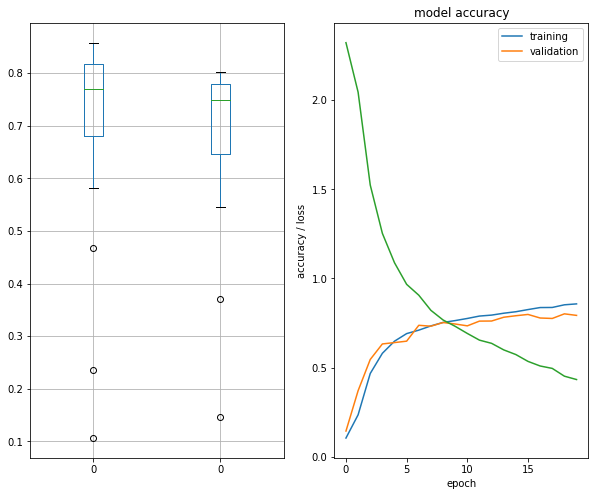

In [ ]:
for layers in range(2,5):
    svhn1 = create_dense([1024] * layers)
    evaluate(svhn1)

#### Observation on Number of layers:
  *) model with 3 hidden layers and 1024 nerons each gives as higher accuracy than others,however the validation accuracy fluctuates which may results in overfitting.
     This is because of more number of Trainable params: 31,59050.

##### Trying with lesser number of neurons in each layer:

[512, 512]
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_121 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_122 (Dense)            (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.7804999947547913


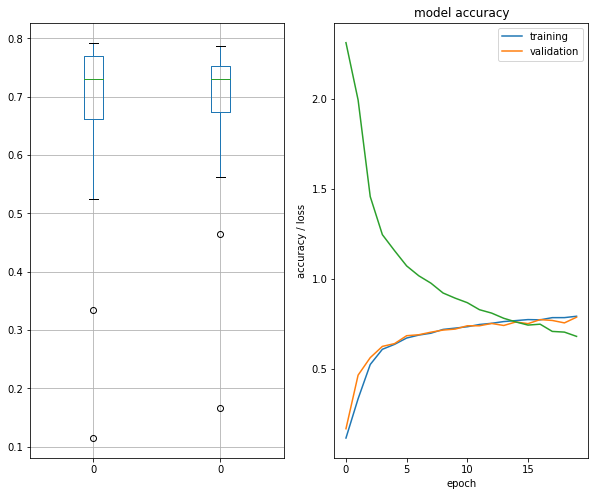

[512, 512, 512]
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_124 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_125 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_126 (Dense)            (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.7969444394111633


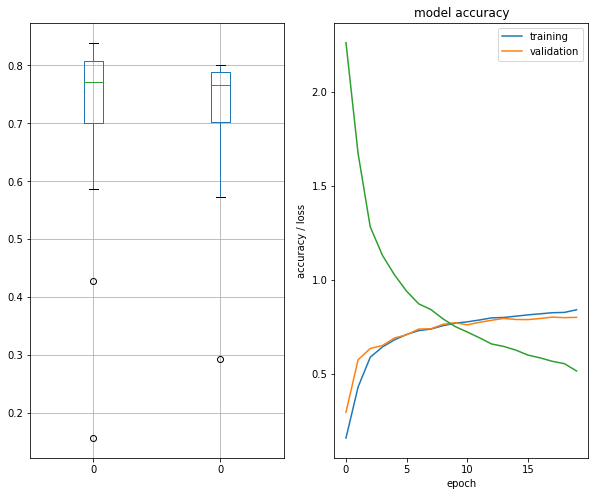

[512, 512, 512, 512]
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_128 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_129 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_130 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_131 (Dense)            (None, 10)                5130      
Total params: 1,317,898
Trainable params: 1,317,898
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.7919444441795349


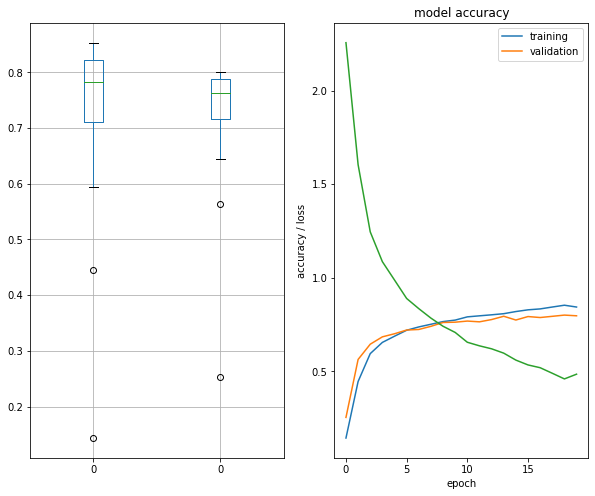

In [ ]:
for layers in range(2,5):
    svhn1 = create_dense([512] * layers)
    evaluate(svhn1)

###### Observation:
  *) Three layers with 512 neurons performs faster and better than three layer with 1024 neurons.

#### Trying with 256 neurons

[256, 256]
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_133 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_134 (Dense)            (None, 10)                2570      
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.761722207069397


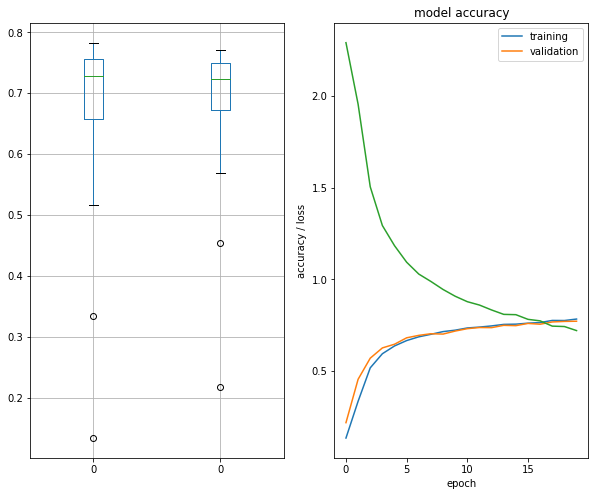

[256, 256, 256]
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_136 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_137 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_138 (Dense)            (None, 10)                2570      
Total params: 396,554
Trainable params: 396,554
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.7792222499847412


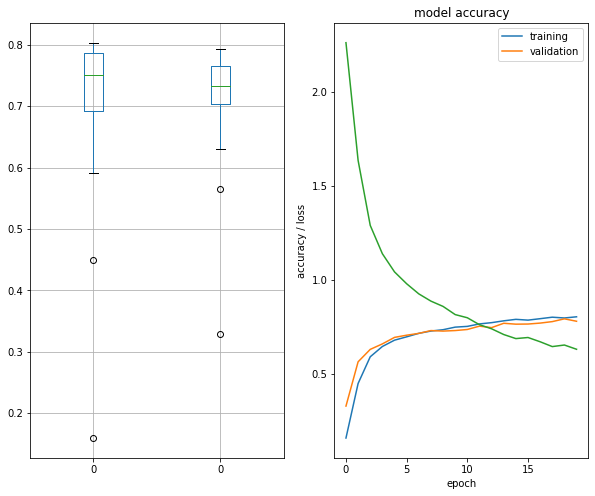

[256, 256, 256, 256]
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_140 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_141 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_142 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_143 (Dense)            (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.7687222361564636


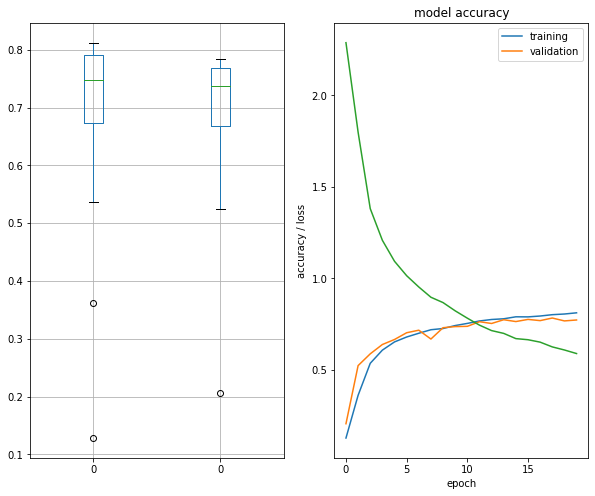

[256, 256, 256, 256, 256]
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_145 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_146 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_147 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_148 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_149 (Dense)            (None, 10)                2570      
Total params: 528,138
Trainable params: 528,138
Non-trainable params: 0
_____________________

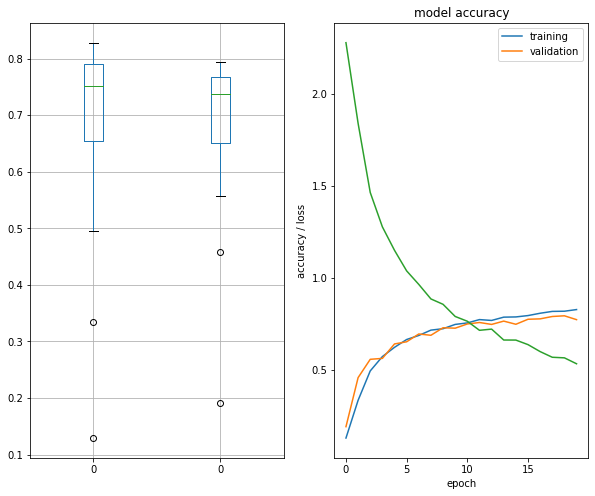

In [ ]:
for layers in range(2,6):
    svhn1 = create_dense([256] * layers)
    evaluate(svhn1)

###### Observation:
   *) Accuracy drops to 77.9% and degree of overfit reduces further.

##### Trying with 3 hidden layers and varying number of neurons in each layer.

In [ ]:
svhn = Sequential()
svhn.add(Dense(1024,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(512,activation = 'relu'))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size= 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

loss, test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)

Epoch 1/20
112/112 [==============================] - 5s 45ms/step - loss: 2.3614 - accuracy: 0.1049 - val_loss: 2.2694 - val_accuracy: 0.1710
Epoch 2/20
112/112 [==============================] - 5s 44ms/step - loss: 2.1189 - accuracy: 0.2282 - val_loss: 1.6433 - val_accuracy: 0.4302
Epoch 3/20
112/112 [==============================] - 5s 44ms/step - loss: 1.4931 - accuracy: 0.5040 - val_loss: 1.2874 - val_accuracy: 0.5767
Epoch 4/20
112/112 [==============================] - 5s 44ms/step - loss: 1.2226 - accuracy: 0.6062 - val_loss: 1.1006 - val_accuracy: 0.6595
Epoch 5/20
112/112 [==============================] - 5s 44ms/step - loss: 1.0782 - accuracy: 0.6609 - val_loss: 1.0164 - val_accuracy: 0.6821
Epoch 6/20
112/112 [==============================] - 5s 43ms/step - loss: 0.9839 - accuracy: 0.6915 - val_loss: 0.9701 - val_accuracy: 0.6983
Epoch 7/20
112/112 [==============================] - 5s 43ms/step - loss: 0.9131 - accuracy: 0.7181 - val_loss: 0.8824 - val_accuracy: 0.7298

model test accuracy :  0.7919444441795349


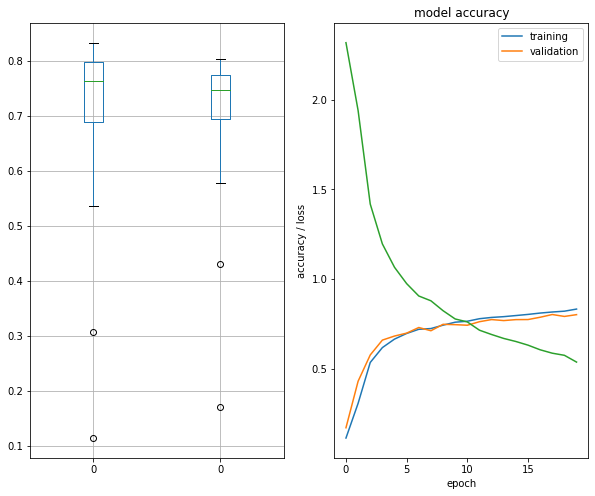

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])


print("model test accuracy : ", test_accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

###### Observation:
    *) Accuaracy is slightly improving but the graph is still fluctuating. 

#### Trying with 512 in first layer and reducing it in upcoming layer

In [ ]:
svhn = Sequential()
svhn.add(Dense(512,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dense(128,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)
loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)

Epoch 1/20
140/140 [==============================] - 3s 21ms/step - loss: 2.3189 - accuracy: 0.1103 - val_loss: 2.1677 - val_accuracy: 0.1989
Epoch 2/20
140/140 [==============================] - 3s 20ms/step - loss: 2.0005 - accuracy: 0.2804 - val_loss: 1.5024 - val_accuracy: 0.4969
Epoch 3/20
140/140 [==============================] - 3s 20ms/step - loss: 1.4096 - accuracy: 0.5403 - val_loss: 1.2118 - val_accuracy: 0.6167
Epoch 4/20
140/140 [==============================] - 3s 20ms/step - loss: 1.1599 - accuracy: 0.6337 - val_loss: 1.0711 - val_accuracy: 0.6663
Epoch 5/20
140/140 [==============================] - 3s 20ms/step - loss: 1.0467 - accuracy: 0.6736 - val_loss: 1.0436 - val_accuracy: 0.6698
Epoch 6/20
140/140 [==============================] - 3s 20ms/step - loss: 0.9779 - accuracy: 0.6920 - val_loss: 0.9130 - val_accuracy: 0.7200
Epoch 7/20
140/140 [==============================] - 3s 20ms/step - loss: 0.8953 - accuracy: 0.7245 - val_loss: 0.9537 - val_accuracy: 0.7053

model test accuracy :  0.7990000247955322


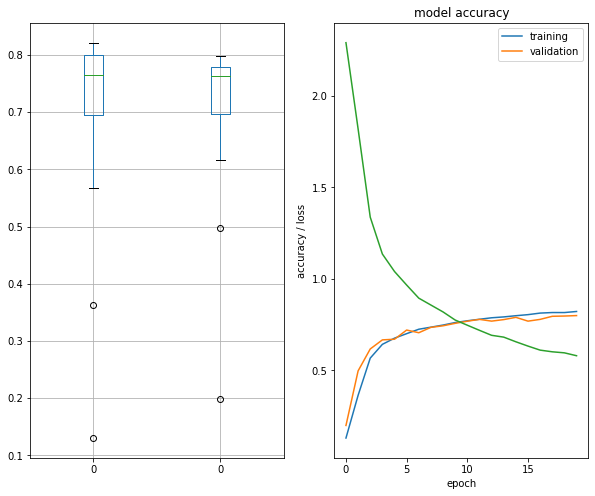

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])


print("model test accuracy : ", test_accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
svhn = Sequential()
svhn.add(Dense(512,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(512,activation = 'relu'))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)
loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)

Epoch 1/20
140/140 [==============================] - 4s 27ms/step - loss: 2.3232 - accuracy: 0.1145 - val_loss: 1.8943 - val_accuracy: 0.3261
Epoch 2/20
140/140 [==============================] - 4s 26ms/step - loss: 1.7178 - accuracy: 0.3981 - val_loss: 1.3797 - val_accuracy: 0.5520
Epoch 3/20
140/140 [==============================] - 4s 28ms/step - loss: 1.3068 - accuracy: 0.5783 - val_loss: 1.1251 - val_accuracy: 0.6496
Epoch 4/20
140/140 [==============================] - 4s 26ms/step - loss: 1.0915 - accuracy: 0.6578 - val_loss: 1.0401 - val_accuracy: 0.6737
Epoch 5/20
140/140 [==============================] - 4s 26ms/step - loss: 0.9990 - accuracy: 0.6861 - val_loss: 0.9398 - val_accuracy: 0.7109
Epoch 6/20
140/140 [==============================] - 4s 26ms/step - loss: 0.9197 - accuracy: 0.7118 - val_loss: 0.9048 - val_accuracy: 0.7197
Epoch 7/20
140/140 [==============================] - 4s 26ms/step - loss: 0.8572 - accuracy: 0.7342 - val_loss: 0.8360 - val_accuracy: 0.7430

model test accuracy :  0.804722249507904


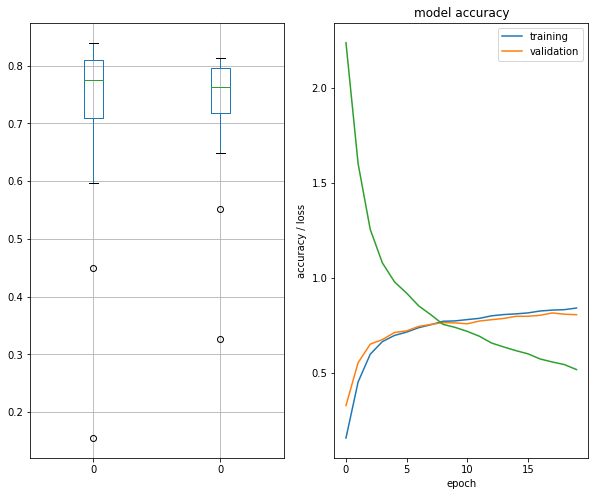

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])


print("model test accuracy : ", test_accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
svhn = Sequential()
svhn.add(Dense(768,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(512,activation = 'relu'))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)
loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)

Epoch 1/20
140/140 [==============================] - 5s 37ms/step - loss: 2.3117 - accuracy: 0.1251 - val_loss: 1.7931 - val_accuracy: 0.3638
Epoch 2/20
140/140 [==============================] - 5s 35ms/step - loss: 1.6126 - accuracy: 0.4482 - val_loss: 1.2051 - val_accuracy: 0.6149
Epoch 3/20
140/140 [==============================] - 5s 35ms/step - loss: 1.2062 - accuracy: 0.6151 - val_loss: 1.1516 - val_accuracy: 0.6321
Epoch 4/20
140/140 [==============================] - 5s 35ms/step - loss: 1.0543 - accuracy: 0.6661 - val_loss: 0.9439 - val_accuracy: 0.7093
Epoch 5/20
140/140 [==============================] - 5s 35ms/step - loss: 0.9353 - accuracy: 0.7123 - val_loss: 0.9084 - val_accuracy: 0.7201
Epoch 6/20
140/140 [==============================] - 5s 36ms/step - loss: 0.8798 - accuracy: 0.7249 - val_loss: 0.8735 - val_accuracy: 0.7306
Epoch 7/20
140/140 [==============================] - 5s 35ms/step - loss: 0.8086 - accuracy: 0.7514 - val_loss: 0.8183 - val_accuracy: 0.7522

model test accuracy :  0.8213889002799988


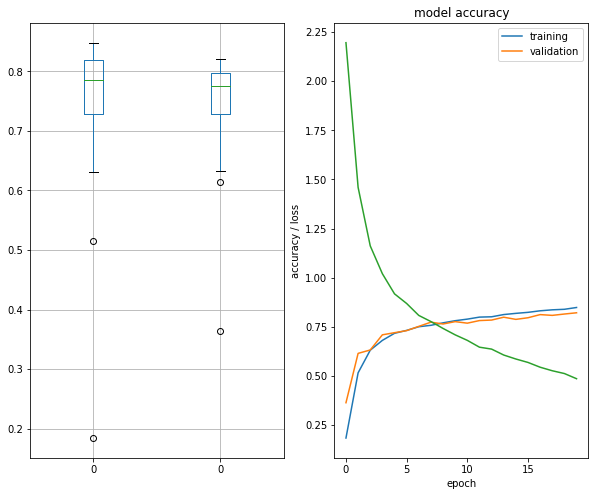

In [ ]:
print("model test accuracy : ", test_accuracy)
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
svhn = Sequential()
svhn.add(Dense(128,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(128,activation = 'relu'))
svhn.add(Dense(64,activation = 'relu'))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)

Epoch 1/20
140/140 [==============================] - 2s 9ms/step - loss: 2.3042 - accuracy: 0.1097 - val_loss: 2.1704 - val_accuracy: 0.2031
Epoch 2/20
140/140 [==============================] - 1s 8ms/step - loss: 2.0116 - accuracy: 0.2779 - val_loss: 1.5350 - val_accuracy: 0.4832
Epoch 3/20
140/140 [==============================] - 1s 8ms/step - loss: 1.4886 - accuracy: 0.5023 - val_loss: 1.3102 - val_accuracy: 0.5743
Epoch 4/20
140/140 [==============================] - 1s 8ms/step - loss: 1.2905 - accuracy: 0.5843 - val_loss: 1.2147 - val_accuracy: 0.6095
Epoch 5/20
140/140 [==============================] - 1s 8ms/step - loss: 1.1915 - accuracy: 0.6224 - val_loss: 1.1145 - val_accuracy: 0.6497
Epoch 6/20
140/140 [==============================] - 1s 8ms/step - loss: 1.1139 - accuracy: 0.6505 - val_loss: 1.1214 - val_accuracy: 0.6466
Epoch 7/20
140/140 [==============================] - 1s 8ms/step - loss: 1.0773 - accuracy: 0.6606 - val_loss: 1.0128 - val_accuracy: 0.6865
Epoch 

model test accuracy :  0.8213889002799988


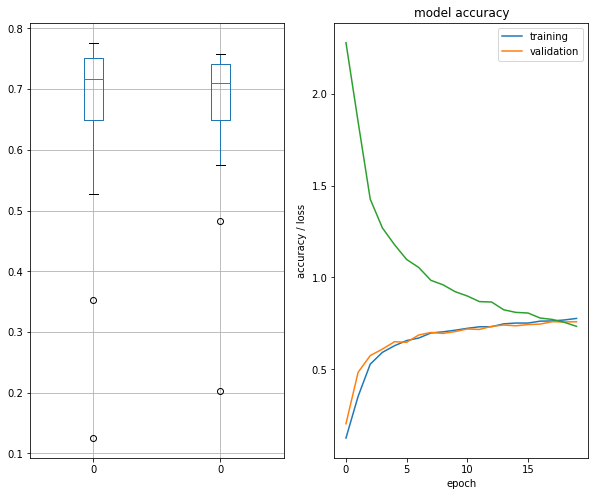

In [ ]:
print("model test accuracy : ", test_accuracy)
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Out of all combinations, neurons 768,512,256 in three hidden layers performs well.

### Trying Batch Normalization and dropout regularisation

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
svhn = Sequential()
svhn.add(Dense(768,activation = 'relu',input_shape=(1024,)))
svhn.add(BatchNormalization())
svhn.add(Dense(512,activation = 'relu'))
svhn.add(BatchNormalization())
svhn.add(Dropout(0.1))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)

Epoch 1/20
140/140 [==============================] - 7s 45ms/step - loss: 1.7935 - accuracy: 0.4072 - val_loss: 1.6998 - val_accuracy: 0.4079
Epoch 2/20
140/140 [==============================] - 6s 44ms/step - loss: 0.9934 - accuracy: 0.6865 - val_loss: 2.1526 - val_accuracy: 0.3293
Epoch 3/20
140/140 [==============================] - 6s 43ms/step - loss: 0.8568 - accuracy: 0.7302 - val_loss: 2.4749 - val_accuracy: 0.3231
Epoch 4/20
140/140 [==============================] - 6s 43ms/step - loss: 0.7509 - accuracy: 0.7682 - val_loss: 1.8679 - val_accuracy: 0.4756
Epoch 5/20
140/140 [==============================] - 6s 43ms/step - loss: 0.6843 - accuracy: 0.7882 - val_loss: 1.5461 - val_accuracy: 0.5357
Epoch 6/20
140/140 [==============================] - 6s 43ms/step - loss: 0.6146 - accuracy: 0.8076 - val_loss: 1.5330 - val_accuracy: 0.5672
Epoch 7/20
140/140 [==============================] - 6s 43ms/step - loss: 0.5795 - accuracy: 0.8211 - val_loss: 1.1155 - val_accuracy: 0.6539

#### Using BatchNormalization alone:

In [ ]:
svhn = Sequential()
svhn.add(Dense(768,activation = 'relu',input_shape=(1024,)))
svhn.add(BatchNormalization())
svhn.add(Dense(512,activation = 'relu'))
svhn.add(BatchNormalization())
svhn.add(Dense(256,activation = 'relu'))
svhn.add(BatchNormalization())
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 400
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)

Epoch 1/20
105/105 [==============================] - 7s 55ms/step - loss: 1.7198 - accuracy: 0.4442 - val_loss: 1.8461 - val_accuracy: 0.4234
Epoch 2/20
105/105 [==============================] - 5s 52ms/step - loss: 0.8901 - accuracy: 0.7214 - val_loss: 1.7804 - val_accuracy: 0.3804
Epoch 3/20
105/105 [==============================] - 5s 52ms/step - loss: 0.7453 - accuracy: 0.7682 - val_loss: 2.1224 - val_accuracy: 0.3578
Epoch 4/20
105/105 [==============================] - 5s 52ms/step - loss: 0.6568 - accuracy: 0.7967 - val_loss: 3.3717 - val_accuracy: 0.2266
Epoch 5/20
105/105 [==============================] - 6s 54ms/step - loss: 0.5988 - accuracy: 0.8187 - val_loss: 2.0260 - val_accuracy: 0.4302
Epoch 6/20
105/105 [==============================] - 5s 51ms/step - loss: 0.5570 - accuracy: 0.8292 - val_loss: 2.9927 - val_accuracy: 0.3661
Epoch 7/20
105/105 [==============================] - 5s 52ms/step - loss: 0.4997 - accuracy: 0.8455 - val_loss: 2.9910 - val_accuracy: 0.3729

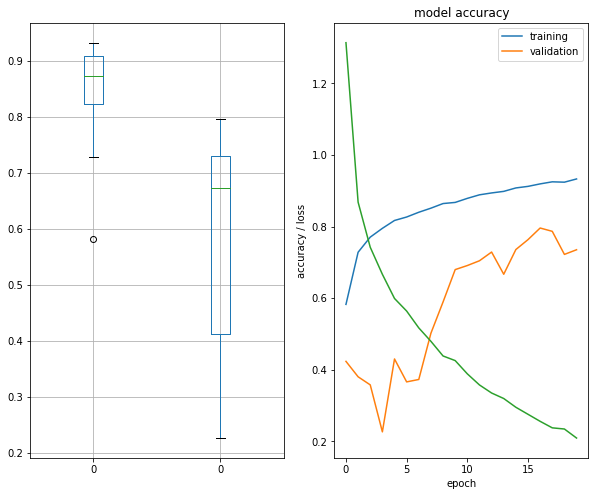

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#### Using dropout layer only

In [ ]:
svhn = Sequential()
svhn.add(Dense(768,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(512,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 20

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1)

Epoch 1/20
140/140 [==============================] - 6s 39ms/step - loss: 2.3246 - accuracy: 0.1074 - val_loss: 2.0209 - val_accuracy: 0.2845
Epoch 2/20
140/140 [==============================] - 5s 38ms/step - loss: 1.7987 - accuracy: 0.3632 - val_loss: 1.3295 - val_accuracy: 0.5617
Epoch 3/20
140/140 [==============================] - 5s 38ms/step - loss: 1.3104 - accuracy: 0.5647 - val_loss: 1.1176 - val_accuracy: 0.6497
Epoch 4/20
140/140 [==============================] - 5s 38ms/step - loss: 1.1501 - accuracy: 0.6375 - val_loss: 1.0285 - val_accuracy: 0.6786
Epoch 5/20
140/140 [==============================] - 5s 38ms/step - loss: 1.0218 - accuracy: 0.6795 - val_loss: 0.9121 - val_accuracy: 0.7217
Epoch 6/20
140/140 [==============================] - 5s 38ms/step - loss: 0.9455 - accuracy: 0.7064 - val_loss: 0.9069 - val_accuracy: 0.7219
Epoch 7/20
140/140 [==============================] - 5s 38ms/step - loss: 0.8836 - accuracy: 0.7231 - val_loss: 0.8452 - val_accuracy: 0.7392

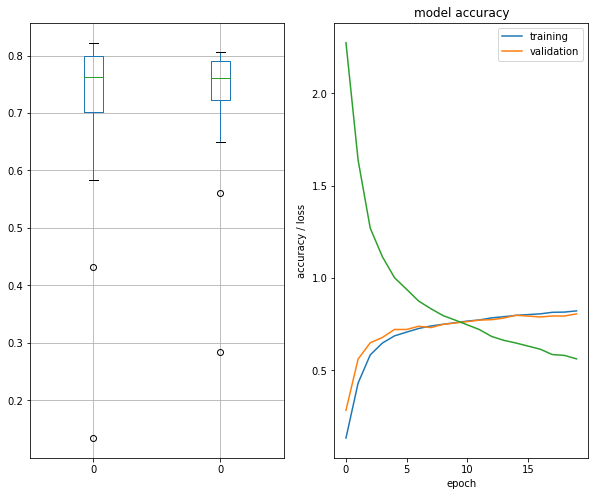

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

###### Observation:

*) Batch Normalization layer leads unstable behaviour in the model. It gives higher training accuracy(93.93%) but fails in test accuracy(73.53%). Overfitting issue.
*) Using Dropout is not yeilding better accuracy but it helps to reduce the overfitting issue.
   previously without using dropout layer we were getting 84.6% training accuracy and 82% test accuracy
   after using the dropout layer the training accuracy is 82.45% and test accuracy is 80.63% which is more generalisable.


### Using Weight Initialization Technique

In [ ]:
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
weights = [he_uniform, he_normal, glorot_normal, glorot_uniform]
batch_size = 300
epochs = 20

<class 'tensorflow.python.keras.initializers.initializers_v2.HeUniform'>
model training accuracy : [0.11690476536750793, 0.4250238239765167, 0.6053809523582458, 0.6688095331192017, 0.6903095245361328, 0.711976170539856, 0.7301190495491028, 0.7449047565460205, 0.7557380795478821, 0.7714999914169312, 0.7757619023323059, 0.7876428365707397, 0.7935476303100586, 0.7995714545249939, 0.8062142729759216, 0.812333345413208, 0.8150237798690796, 0.8188095092773438, 0.8233333230018616, 0.8288333415985107]
model validation accuracy :  [0.2309444397687912, 0.5751110911369324, 0.6616666913032532, 0.6928889155387878, 0.7152777910232544, 0.7257221937179565, 0.7368333339691162, 0.7598888874053955, 0.7689444422721863, 0.7785555720329285, 0.7570000290870667, 0.7914999723434448, 0.7720555663108826, 0.792722225189209, 0.7969444394111633, 0.7902222275733948, 0.7940000295639038, 0.804888904094696, 0.8160555362701416, 0.8081666827201843]
model test accuracy :  0.8081666827201843


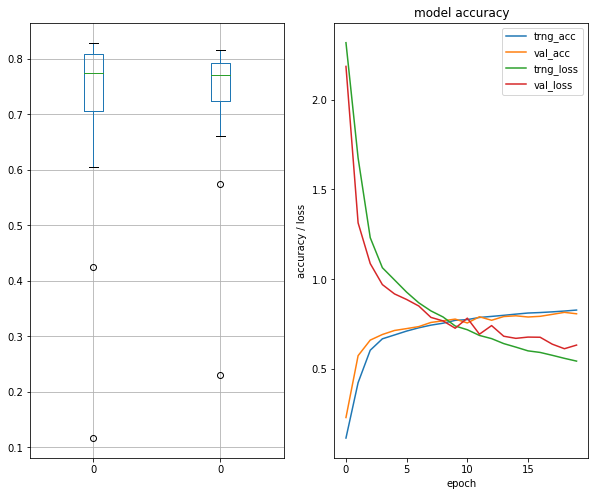

<class 'tensorflow.python.keras.initializers.initializers_v2.HeNormal'>
model training accuracy : [0.16426190733909607, 0.48185715079307556, 0.6199047565460205, 0.680571436882019, 0.708214282989502, 0.7307857275009155, 0.7480952143669128, 0.7578095197677612, 0.7665238380432129, 0.7809761762619019, 0.7882857322692871, 0.7940000295639038, 0.7972618937492371, 0.8050000071525574, 0.8080714344978333, 0.8189523816108704, 0.8263571262359619, 0.8272857069969177, 0.8341190218925476, 0.8356666564941406]
model validation accuracy :  [0.3639444410800934, 0.6186110973358154, 0.6834999918937683, 0.6982222199440002, 0.741944432258606, 0.7483333349227905, 0.7482777833938599, 0.7768333554267883, 0.7647222280502319, 0.7873333096504211, 0.785277783870697, 0.7888333201408386, 0.7866111397743225, 0.7938888669013977, 0.8026666641235352, 0.7982222437858582, 0.8093888759613037, 0.8034999966621399, 0.7979444265365601, 0.7983888983726501]
model test accuracy :  0.7983888983726501


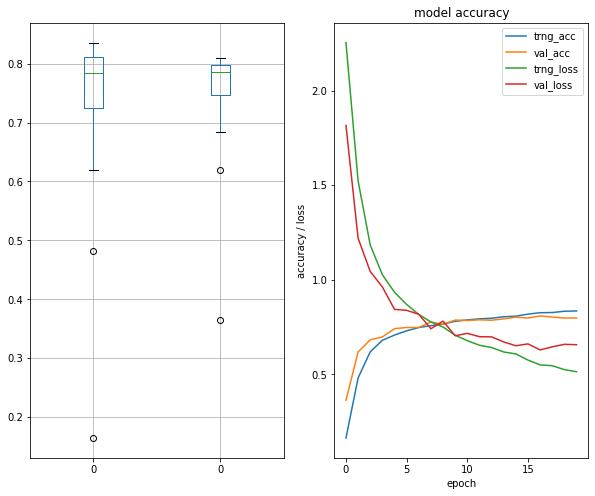

<class 'tensorflow.python.keras.initializers.initializers_v2.GlorotNormal'>
model training accuracy : [0.11400000005960464, 0.3697619140148163, 0.5936428308486938, 0.6599047780036926, 0.6932380795478821, 0.7173333168029785, 0.7284047603607178, 0.741261899471283, 0.7525476217269897, 0.7626904845237732, 0.7692381143569946, 0.7788809537887573, 0.788023829460144, 0.7927380800247192, 0.7963809370994568, 0.8065476417541504, 0.8130000233650208, 0.81592857837677, 0.824999988079071, 0.8273571133613586]
model validation accuracy :  [0.1821666657924652, 0.5201666951179504, 0.6552222371101379, 0.6967222094535828, 0.7229999899864197, 0.7315000295639038, 0.7359444499015808, 0.7459444403648376, 0.7532222270965576, 0.7735000252723694, 0.7789999842643738, 0.7646666765213013, 0.7861111164093018, 0.7958889007568359, 0.789722204208374, 0.7944999933242798, 0.801111102104187, 0.7970555424690247, 0.8069444298744202, 0.8137221932411194]
model test accuracy :  0.8137221932411194


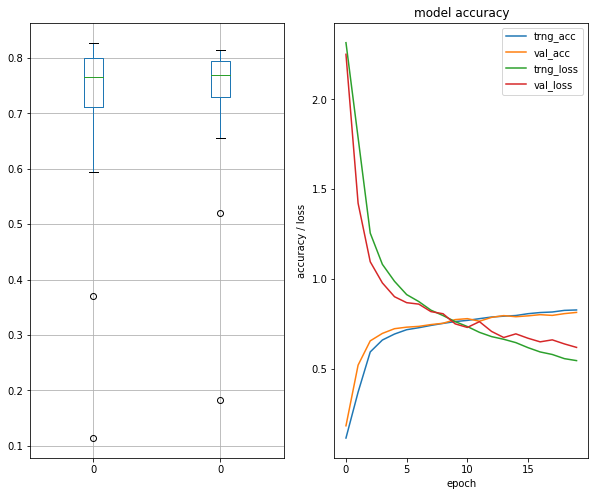

<class 'tensorflow.python.keras.initializers.initializers_v2.GlorotUniform'>
model training accuracy : [0.12999999523162842, 0.43752381205558777, 0.6045476198196411, 0.6615238189697266, 0.6966666579246521, 0.7193571329116821, 0.7268571257591248, 0.7473571300506592, 0.7532380819320679, 0.7672857046127319, 0.7694761753082275, 0.7807857394218445, 0.7853809595108032, 0.7953571677207947, 0.7988571524620056, 0.8058809638023376, 0.810952365398407, 0.8127142786979675, 0.8199285864830017, 0.8216190338134766]
model validation accuracy :  [0.2707222104072571, 0.5404444336891174, 0.648888885974884, 0.6878888607025146, 0.7242222428321838, 0.7323333621025085, 0.750166654586792, 0.7429444193840027, 0.7638333439826965, 0.765666663646698, 0.7584999799728394, 0.784166693687439, 0.7796111106872559, 0.7907222509384155, 0.7940000295639038, 0.788777768611908, 0.7987222075462341, 0.8089444637298584, 0.796999990940094, 0.7947221994400024]
model test accuracy :  0.7947221994400024


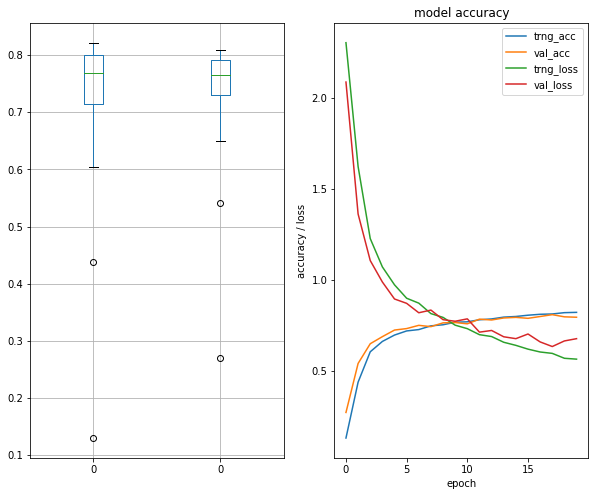

In [ ]:
for i in weights:
  svhn = Sequential()
  svhn.add(Dense(768,activation = 'relu',input_shape=(1024,),kernel_initializer = i))
  svhn.add(Dense(512,activation = 'relu',kernel_initializer = he_uniform))
  svhn.add(Dropout(0.1))
  svhn.add(Dense(256,activation = 'relu',kernel_initializer = he_uniform))
  svhn.add(Dropout(0.1))
  svhn.add(Dense(10,activation = 'softmax')) 
  print(i)
  svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=False)
  loss,test_accuracy  = svhn.evaluate(x_test, y_test, verbose=False)
  print("model training accuracy :" , history.history['accuracy'])
  print("model validation accuracy : ", history.history['val_accuracy'])
  print("model test accuracy : ", test_accuracy)

  f, axes = plt.subplots(1, 2, figsize = (10,8))
  ta = pd.DataFrame(history.history['accuracy'])
  va = pd.DataFrame(history.history['val_accuracy'])
  tva = pd.concat([ta,va] , axis=1)
  tva.boxplot(ax=axes[0])

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model accuracy')
  plt.ylabel('accuracy / loss')
  plt.xlabel('epoch')
  plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
  plt.show()


###### Observation:
he_normal: training 83.5% and test = 79.8%
he_uniform: training 82.8% and test = 80.8% but the validation accuracy fluctuates more
glorot_uniform: training 82.16% and test = 79.47% but the validation accuracy fluctuates more.
glorot_normal : training 82.7% and test = 81.3% but the validation accuracy fluctuates more.

Weight Initialization is not yielding better result as the model is not deep enough.

#### Increasing the epochs with earlystopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
svhn = Sequential()
svhn.add(Dense(768,activation = 'relu',input_shape=(1024,)))
svhn.add(Dense(512,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 50

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience =5 )
history = svhn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1,callbacks = [es])


Epoch 1/50
140/140 [==============================] - 6s 38ms/step - loss: 2.3396 - accuracy: 0.1037 - val_loss: 2.1236 - val_accuracy: 0.2232
Epoch 2/50
140/140 [==============================] - 5s 37ms/step - loss: 1.9065 - accuracy: 0.3156 - val_loss: 1.4375 - val_accuracy: 0.5171
Epoch 3/50
140/140 [==============================] - 5s 39ms/step - loss: 1.4003 - accuracy: 0.5330 - val_loss: 1.1799 - val_accuracy: 0.6227
Epoch 4/50
140/140 [==============================] - 5s 38ms/step - loss: 1.1448 - accuracy: 0.6394 - val_loss: 0.9817 - val_accuracy: 0.6972
Epoch 5/50
140/140 [==============================] - 5s 38ms/step - loss: 1.0091 - accuracy: 0.6875 - val_loss: 0.9153 - val_accuracy: 0.7219
Epoch 6/50
140/140 [==============================] - 5s 38ms/step - loss: 0.9604 - accuracy: 0.7009 - val_loss: 0.9219 - val_accuracy: 0.7104
Epoch 7/50
140/140 [==============================] - 5s 38ms/step - loss: 0.8829 - accuracy: 0.7271 - val_loss: 0.8241 - val_accuracy: 0.7472

In [ ]:
svhn.save("svhn_project2.h5")

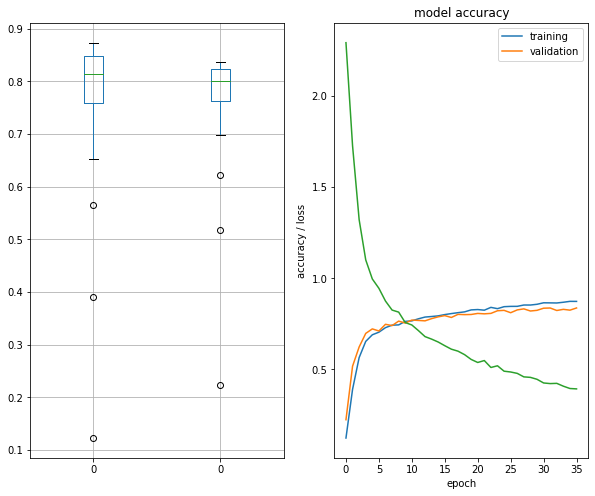

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

###### Observation:
       *) With increase in epochs the distance between training and validation accuracy increases.
      

In [ ]:
from keras.models import load_model
loaded_model = load_model("svhn_project2.h5") 
loss, accuracy = loaded_model.evaluate(x_test,y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.5685 - accuracy: 0.8369


### Trying Image Augmentation:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 32, 32)
(18000, 32, 32)


In [ ]:
Reshaping the image size

In [ ]:
xtrain = tf.expand_dims(X_train,-1)

In [ ]:
xtest = tf.expand_dims(X_test,-1)

In [ ]:
xtrain.shape

TensorShape([42000, 32, 32, 1])

In [ ]:
xtest.shape

TensorShape([18000, 32, 32, 1])

In [ ]:
xtrain= xtrain/255
xtest= xtest/255

In [ ]:
xtrain.dtype

tf.float32

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)   
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
augment = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,
                             zoom_range= 0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                              fill_mode='nearest')
                             

In [ ]:
augment.fit(xtrain)

In [ ]:
xtrain.shape

TensorShape([42000, 32, 32, 1])

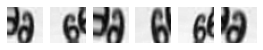

In [ ]:
from matplotlib import pyplot as plt
gen = augment.flow(xtrain[101:102], batch_size=1)
for i in range(1,7):
    plt.subplot(1,8,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [ ]:
Y_test.shape

(18000, 10)

In [ ]:
Y_train.shape

(42000, 10)

##### Adding Flatten and Batchnormalization layer

In [ ]:
svhn = Sequential()
svhn.add(Flatten())
svhn.add(BatchNormalization())
svhn.add(Dense(768,activation = 'relu'))
svhn.add(BatchNormalization())
svhn.add(Dense(512,activation = 'relu'))
svhn.add(BatchNormalization())
svhn.add(Dropout(0.1))
svhn.add(Dense(256,activation = 'relu'))
svhn.add(Dropout(0.1))
svhn.add(Dense(10,activation = 'softmax'))

In [ ]:
batch_size = 300
epochs = 50

svhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience =5 )

In [ ]:
history= svhn.fit_generator(augment.flow(xtrain,Y_train,batch_size=batch_size),epochs= epochs, validation_data = (xtest,Y_test),callbacks=[es])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
140/140 [==============================] - 21s 139ms/step - loss: 2.4470 - accuracy: 0.1563 - val_loss: 2.1041 - val_accuracy: 0.2677
Epoch 2/50
140/140 [==============================] - 19s 136ms/step - loss: 1.9885 - accuracy: 0.3059 - val_loss: 1.6349 - val_accuracy: 0.4677
Epoch 3/50
140/140 [==============================] - 19s 136ms/step - loss: 1.7679 - accuracy: 0.3952 - val_loss: 1.3577 - val_accuracy: 0.5571
Epoch 4/50
140/140 [==============================] - 19s 136ms/step - loss: 1.6492 - accuracy: 0.4391 - val_loss: 1.2275 - val_accuracy: 0.5977
Epoch 5/50
140/140 [==============================] - 19s 137ms/step - loss: 1.5497 - accuracy: 0.4769 - val_loss: 1.1465 - val_accuracy: 0.6222
Epoch 6/50
140/140 [==============================] - 19s 135ms/step - loss: 1.4822 - accuracy: 0.5038 - val_loss: 1.0499 - val_accuracy: 0.6601
Epoch 7/50
140/140 [==============================] - 19s 136ms/step - loss: 1.4139 - accuracy: 0.5263 - val_loss: 1.0181 - val_ac

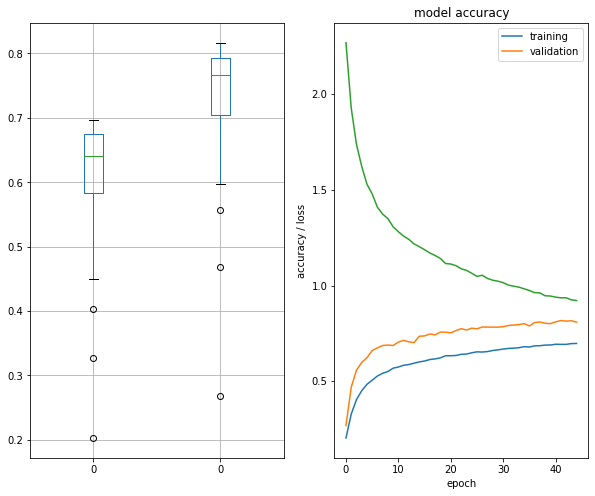

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (10,8))
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])
tva = pd.concat([ta,va] , axis=1)
tva.boxplot(ax=axes[0])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

###### Observation:
   *) Image augmetation helping us to improve the test accuracy but the training accuracy is lesser than the test.
   
   *) If we try using convolution layers along with augmentation we may get better accuracy and reliable model. 